In [1]:
# Enter a day in April for which you would like to compare Canada's (to be affected) provinces
# Run each cell step by step
day = 18

In [2]:
# Filtering out the training and testing data for Canada

# Import desired libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBRegressor

# Filter out Canadian Training & Testing Data
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
Canada_train = df1[df1.Country_Region=='Canada']
Canada_test = df2[df2.Country_Region=='Canada']

In [3]:
Canada_train.tail(75)

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
3852,5353,Yukon,Canada,2020-01-24,0.0,0.0
3853,5354,Yukon,Canada,2020-01-25,0.0,0.0
3854,5355,Yukon,Canada,2020-01-26,0.0,0.0
3855,5356,Yukon,Canada,2020-01-27,0.0,0.0
3856,5357,Yukon,Canada,2020-01-28,0.0,0.0
...,...,...,...,...,...,...
3922,5423,Yukon,Canada,2020-04-03,6.0,0.0
3923,5424,Yukon,Canada,2020-04-04,6.0,0.0
3924,5425,Yukon,Canada,2020-04-05,6.0,0.0
3925,5426,Yukon,Canada,2020-04-06,6.0,0.0


In [4]:
# Gathering the confirmed cases using group by on the latest date
Canada_train_edit = Canada_train[Canada_train['Date']=='2020-04-07']
con = Canada_train_edit.groupby(['Province_State']).sum()
con = con.sort_values(by=['ConfirmedCases'],ascending=False)
con = con.drop(columns=['Id', 'Fatalities'])

# Top 5 Provinces in terms of confirmed cases and fatalities
print(con.head(5))

                  ConfirmedCases
Province_State                  
Quebec                    9340.0
Ontario                   4726.0
Alberta                   1373.0
British Columbia          1266.0
Nova Scotia                310.0


In [5]:
# Training data for provinces
Quebec1 = df1[df1.Province_State=='Quebec']
Ontario1 = df1[df1.Province_State=='Ontario']
Alberta1 = df1[df1.Province_State=='Alberta']
British_Columbia1 = df1[df1.Province_State=='British Columbia']
Nova_Scotia1 = df1[df1.Province_State=='Nova Scotia']

# Testing data for provinces
Quebec2 = df2[df2.Province_State=='Quebec']
Ontario2 = df2[df2.Province_State=='Ontario']
Alberta2 = df2[df2.Province_State=='Alberta']
British_Columbia2 = df2[df2.Province_State=='British Columbia']
Nova_Scotia2 = df2[df2.Province_State=='Nova Scotia'];

In [6]:
# Create a list of training data sets so we can loop through them for operations and featurization

lst_training=[Quebec1,Ontario1,Alberta1,British_Columbia1,Nova_Scotia1]
lst_exp =[]

for province in lst_training:
    # Select data range in each province
    province = province[(province['Date'] >= '2020-03-15') & (province['Date'] <= '2020-04-07')]
    province['day_count'] = list(range(1,len(province)+1))
    # Selecting the features to target
    features = ['Id', 'Country_Region', 'Province_State', 'ConfirmedCases', 'Fatalities','day_count']
    province = province[features]
    province[['ConfirmedCases', 'Fatalities']] = province[['ConfirmedCases', 'Fatalities']]
    # Type casting
    province[['ConfirmedCases', 'Fatalities']] = province[['ConfirmedCases', 'Fatalities']].astype('float64')
    # Label Encoder
    le = LabelEncoder()
    le.fit(province['Country_Region'].astype(str))
    le.fit(province['Province_State'].astype(str))
    # Adding the edited training data into a new list
    lst_exp.append(province)

# Asssign the encoded data from the list into new datasets
Quebec_exp = lst_exp[0]
Ontario_exp = lst_exp[1]
Alberta_exp = lst_exp[2]
British_Columbia_exp = lst_exp[3]
Nova_Scotia_exp = lst_exp[4]

# Creating new training lists to store the data for confirmed training datasets, testing datasets
x_training_lst = []
confirmed_training_lst = []
fatality_training_lst = []

# Selecting x training data and assigning
for x_train in lst_exp:
    x_train = x_train.drop(['ConfirmedCases', 'Fatalities'], axis=1)
    x_train.drop('Id', inplace=True, errors='ignore', axis=1)
    x_train.drop('ForecastId', inplace=True, errors='ignore', axis=1)
    x_train.drop('Country_Region', inplace=True, errors='ignore', axis=1)
    x_train.drop('Province_State', inplace=True, errors='ignore', axis=1)
    x_training_lst.append(x_train)

Quebec_x_train = x_training_lst[0]
Ontario_x_train = x_training_lst[1]
Alberta_x_train = x_training_lst[2]
British_Columbia_x_train = x_training_lst[3]
Nova_Scotia_x_train = x_training_lst[4]

# The two types of y data are confirmed cases, fatalities

for y_train_1 in lst_exp:
    y_train_1 = y_train_1['ConfirmedCases']
    confirmed_training_lst.append(y_train_1)

# Assign the confirmed training data into the provinces    
Quebec_y_train_1 = confirmed_training_lst[0]
Ontario_y_train_1 = confirmed_training_lst[1]
Alberta_y_train_1 = confirmed_training_lst[2]
British_Columbia_y_train_1 = confirmed_training_lst[3]
Nova_Scotia_y_train_1 = confirmed_training_lst[4]

for y_train_2 in lst_exp:
    y_train_2 = y_train_2['Fatalities']
    fatality_training_lst.append(y_train_2)
    
# Assign the fatality training data into the provinces  
Quebec_y_train_2 = fatality_training_lst[0]
Ontario_y_train_2 = fatality_training_lst[1]
Alberta_y_train_2 = fatality_training_lst[2]
British_Columbia_y_train_2 = fatality_training_lst[3]
Nova_Scotia_y_train_2 = fatality_training_lst[4]

/Users/zacblac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [7]:
# Filtering first before collecting the test data for top 5 provinces
# A loop has not been implemented here for reasons of visual clarity

Quebec2['day_count'] = list(range(1,len(Quebec2)+1)) 
Quebec2['day_count'] = Quebec2.day_count + 11
Quebec2 = Quebec2[(Quebec2['day_count']<=47)&(Quebec2['day_count']>=18)]
Quebec2_test = Quebec2.copy()

Ontario2['day_count'] = list(range(1,len(Ontario2)+1)) 
Ontario2['day_count'] = Ontario2.day_count + 11
Ontario2 = Ontario2[(Ontario2['day_count']<=47)&(Ontario2['day_count']>=18)]
Ontario2_test = Ontario2.copy()

Alberta2['day_count'] = list(range(1,len(Alberta2)+1)) 
Alberta2['day_count'] = Alberta2.day_count + 11
Alberta2 = Alberta2[(Alberta2['day_count']<=47)&(Alberta2['day_count']>=18)]
Alberta2_test = Alberta2.copy()

British_Columbia2['day_count'] = list(range(1,len(British_Columbia2)+1)) 
British_Columbia2['day_count'] = British_Columbia2.day_count + 11
British_Columbia2 = British_Columbia2[(British_Columbia2['day_count']<=47)&(British_Columbia2['day_count']>=18)]
British_Columbia2_test = British_Columbia2.copy()

Nova_Scotia2['day_count'] = list(range(1,len(Nova_Scotia2)+1)) 
Nova_Scotia2['day_count'] = Nova_Scotia2.day_count + 11
Nova_Scotia2 = Nova_Scotia2[(Nova_Scotia2['day_count']<=47)&(Nova_Scotia2['day_count']>=18)]
Nova_Scotia2_test = Nova_Scotia2.copy()

/Users/zacblac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/zacblac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/zacblac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [8]:
# A list of test data
lst_test=[Quebec2_test,Ontario2_test,Alberta2_test,British_Columbia2_test,Nova_Scotia2_test]
x_test_lst = []

# Editing the test data from the list
for x_test in lst_test:
    x_test.drop('Province_State', inplace=True, errors='ignore', axis=1)
    x_test.drop('ForecastId', inplace=True, errors='ignore', axis=1)
    x_test.drop('Country_Region', inplace=True, errors='ignore', axis=1)
    x_test.drop('Date', inplace=True, errors='ignore', axis=1)
    # Adding the edited test data to the new list
    x_test_lst.append(x_test)

# Test data assignment to provinces
Quebec_x_test = x_test_lst[0]
Ontario_x_test = x_test_lst[1]
Alberta_x_test = x_test_lst[2]
British_Columbia_x_test = x_test_lst[3]
Nova_Scotia_x_test = x_test_lst[4]

In [9]:
# No loop here for reasons of clarity
# Quebec

quebec_model_conf = linear_model.LinearRegression()
quebec_model_death = linear_model.LinearRegression()
quebec_model_conf.fit(Quebec_x_train,Quebec_y_train_1)
quebec_model_death.fit(Quebec_x_train,Quebec_y_train_2)
q_confirmed_prediction = quebec_model_conf.predict(Quebec_x_test)
q_death_prediction = quebec_model_death.predict(Quebec_x_test)
Quebec2.drop('ForecastId', inplace=True, errors='ignore', axis=1)
Quebec2['Confirmed_Prediction'] = q_confirmed_prediction
Quebec2['Death_Prediction'] = q_death_prediction

# Ontario
ontario_model_conf = linear_model.LinearRegression()
ontario_model_death = linear_model.LinearRegression()
ontario_model_conf.fit(Ontario_x_train,Ontario_y_train_1)
ontario_model_death.fit(Ontario_x_train,Ontario_y_train_2)
o_confirmed_prediction = ontario_model_conf.predict(Ontario_x_test)
o_death_prediction = ontario_model_death.predict(Ontario_x_test)
Ontario2.drop('ForecastId', inplace=True, errors='ignore', axis=1)
Ontario2['Confirmed_Prediction'] = o_confirmed_prediction
Ontario2['Death_Prediction'] = o_death_prediction

# Alberta
alberta_model_conf = linear_model.LinearRegression()
alberta_model_death = linear_model.LinearRegression()
alberta_model_conf.fit(Alberta_x_train,Alberta_y_train_1)
alberta_model_death.fit(Alberta_x_train,Alberta_y_train_2)
a_confirmed_prediction = alberta_model_conf.predict(Alberta_x_test)
a_death_prediction = alberta_model_death.predict(Alberta_x_test)
Alberta2.drop('ForecastId', inplace=True, errors='ignore', axis=1)
Alberta2['Confirmed_Prediction'] = a_confirmed_prediction
Alberta2['Death_Prediction'] = a_death_prediction

# British Columbia
british_columbia_model_conf = linear_model.LinearRegression()
british_columbia_model_death = linear_model.LinearRegression()
british_columbia_model_conf.fit(British_Columbia_x_train,British_Columbia_y_train_1)
british_columbia_model_death.fit(British_Columbia_x_train,British_Columbia_y_train_2)
bc_confirmed_prediction = british_columbia_model_conf.predict(British_Columbia_x_test)
bc_death_prediction = british_columbia_model_death.predict(British_Columbia_x_test)
British_Columbia2.drop('ForecastId', inplace=True, errors='ignore', axis=1)
British_Columbia2['Confirmed_Prediction'] = bc_confirmed_prediction
British_Columbia2['Death_Prediction'] = bc_death_prediction

# Nova Scotia
nova_scotia_model_conf = linear_model.LinearRegression()
nova_scotia_model_death = linear_model.LinearRegression()
nova_scotia_model_conf.fit(Nova_Scotia_x_train,Nova_Scotia_y_train_1)
nova_scotia_model_death.fit(Nova_Scotia_x_train,Nova_Scotia_y_train_2)
ns_confirmed_prediction = nova_scotia_model_conf.predict(Nova_Scotia_x_test)
ns_death_prediction = nova_scotia_model_death.predict(Nova_Scotia_x_test)
Nova_Scotia2.drop('ForecastId', inplace=True, errors='ignore', axis=1)
Nova_Scotia2['Confirmed_Prediction'] = ns_confirmed_prediction
Nova_Scotia2['Death_Prediction'] = ns_death_prediction

In [10]:
# Merge & Renaming operations
Merge1 = Quebec2.merge(Ontario2,on=['Date','Country_Region','day_count'])
Merge1 = Merge1.rename(columns={"Province_State_x":"Quebec_Province","Province_State_y":"Ontario_Province"})
Merge1 = Merge1.rename(columns={"Confirmed_Prediction_x":"Quebec Confirmed Predictions","Confirmed_Prediction_y":"Ontario Confirmed Predictions"})
Merge1 = Merge1.rename(columns={"Death_Prediction_x":"Quebec Death Predictions","Death_Prediction_y":"Ontario Death Predictions"})

Merge2 = Merge1.merge(Alberta2,on=['Date','Country_Region','day_count'])
Merge2 = Merge2.rename(columns={"Province_State":"Alberta_Province","Confirmed_Prediction":"Alberta Confirmed Predictions"})
Merge2 = Merge2.rename(columns={"Death_Prediction":"Alberta Death Predictions"})

Merge3 = Merge2.merge(British_Columbia2,on=['Date','Country_Region','day_count'])
Merge3 = Merge3.rename(columns={"Province_State":"British Columbia Province","Confirmed_Prediction":"British Columbia Confirmed Predictions"})
Merge3 = Merge3.rename(columns={"Death_Prediction":"British Columbia Death Predictions"})

Merge4 = Merge3.merge(Nova_Scotia2,on=['Date','Country_Region','day_count'])
Merge4 = Merge4.rename(columns={"Province_State":"Nova Scotia Province","Confirmed_Prediction":"Nova Scotia Confirmed Predictions"})
Merge4 = Merge4.rename(columns={"Death_Prediction":"Nova Scotia Death Predictions"})

Merge4.drop('Country_Region', inplace=True, errors='ignore', axis=1)
Merge4.day_count = Merge4.day_count - 17
# The main dataset has been finally created for Canada
Canada = Merge4.copy()
Canada_edit = Canada[(Canada['day_count'] >= 1) & (Canada['day_count'] <= day)]

In [11]:
# The main dataset has been finally created for Canada
# Feel free to use this dataset for other tasks
Canada = Merge4.copy()

In [12]:
# Day filter
Canada_edit = Canada[(Canada['day_count'] >= 1) & (Canada['day_count'] <= day)]

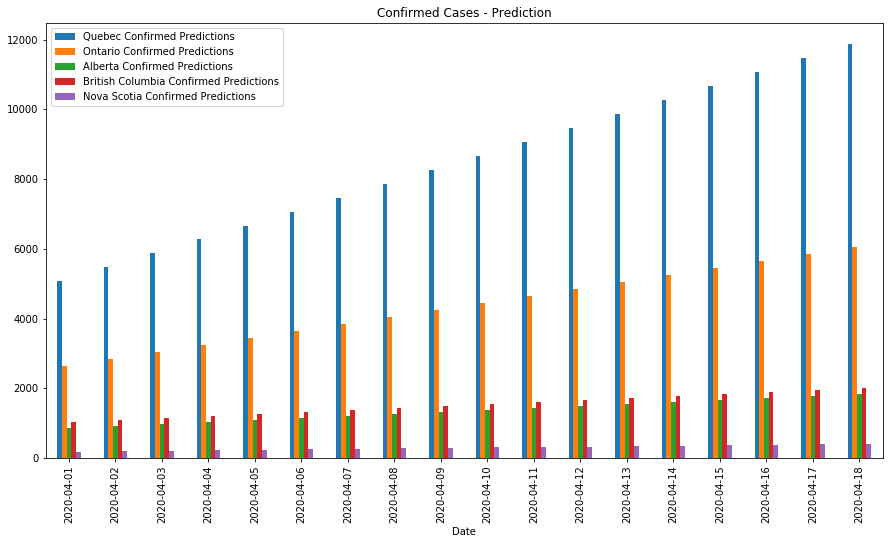

In [13]:
# Confirmed Cases
Canada_edit.plot(title = 'Confirmed Cases - Prediction',figsize=(15,8),x="Date", y=["Quebec Confirmed Predictions", "Ontario Confirmed Predictions", "Alberta Confirmed Predictions","British Columbia Confirmed Predictions","Nova Scotia Confirmed Predictions"], kind="bar")

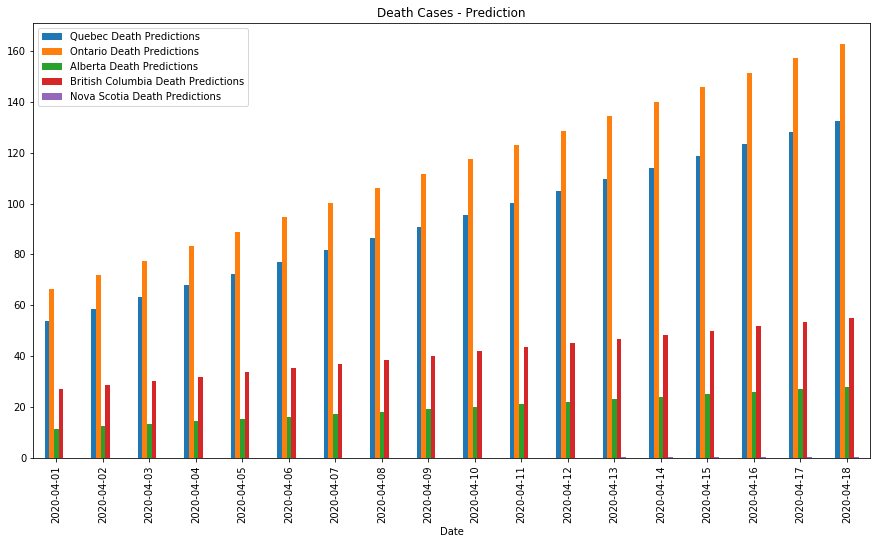

In [68]:
# Death Cases
Canada_edit.plot(title='Death Cases - Prediction',figsize=(15,8),x="Date",y=["Quebec Death Predictions","Ontario Death Predictions","Alberta Death Predictions","British Columbia Death Predictions","Nova Scotia Death Predictions"], kind="bar");